In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import itertools
from warnings import filterwarnings
filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

In [3]:
data = pd.read_csv('data_final.csv')

In [4]:
data.head()

,Date,index,age,job,marital,education,default,housing,loan,contact,...,MOM Inflation,Wage Growth,EURUSD,euro zoneGDP Growth Rate,Portugal Income Tax annual rate,Portugal Bank Lending Rate,Portugal Personal Savings,Portugal Wages,Portugal Unemployment Rate,Portugal Sales Tax
0,2008-05-29,0,56,housemaid,married,basic.4y,no,no,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
1,2008-05-29,1,57,services,married,high.school,unknown,no,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
2,2008-05-29,2,37,services,married,high.school,no,yes,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
3,2008-05-29,3,40,admin.,married,basic.6y,no,no,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
4,2008-05-29,4,56,services,married,high.school,no,no,yes,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0


In [5]:
data.drop(columns=['Date','index'], inplace=True)

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,MOM Inflation,Wage Growth,EURUSD,euro zoneGDP Growth Rate,Portugal Income Tax annual rate,Portugal Bank Lending Rate,Portugal Personal Savings,Portugal Wages,Portugal Unemployment Rate,Portugal Sales Tax
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0


In [7]:
data.isna().sum()

age                                0
job                                0
marital                            0
education                          0
default                            0
housing                            0
loan                               0
contact                            0
month                              0
day_of_week                        0
duration                           0
campaign                           0
pdays                              0
previous                           0
poutcome                           0
emp.var.rate                       0
cons.price.idx                     0
cons.conf.idx                      0
euribor3m                          0
nr.employed                        0
y                                  0
MOM Inflation                      0
Wage Growth                        0
EURUSD                             0
euro zoneGDP Growth Rate           0
Portugal Income Tax annual rate    0
Portugal Bank Lending Rate         0
P

In [8]:
#replacing the white spaces with '-'
#replacing the '.' with '-'
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('.', '_')

In [9]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,MOM_Inflation,Wage_Growth,EURUSD,euro_zoneGDP_Growth_Rate,Portugal_Income_Tax_annual_rate,Portugal_Bank_Lending_Rate,Portugal_Personal_Savings,Portugal_Wages,Portugal_Unemployment_Rate,Portugal_Sales_Tax
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0


In [10]:
data_col = list(data.columns)

In [11]:
for col in data_col:
    print('Values for {}:\n{}\n\n'.format(col, data[col].value_counts()))

Values for age:
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64


Values for job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


Values for marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


Values for education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


Values for default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64


In [12]:
data['age'].max()

98

In [13]:
data['age'].min()

17

In [14]:
data.loc[((data['age'] >= 16 ) & (data['age'] <= 24 )), 'Age_Group'] = '16-24'
data.loc[((data['age'] >= 25 ) & (data['age'] <= 34 )), 'Age_Group'] = '25-34'
data.loc[((data['age'] >= 35 ) & (data['age'] <= 44 )), 'Age_Group'] = '35-44'
data.loc[((data['age'] >= 45 ) & (data['age'] <= 54 )), 'Age_Group'] = '45-54'
data.loc[((data['age'] >= 55 ) & (data['age'] <= 64 )), 'Age_Group'] = '55-64'
data.loc[((data['age'] >= 65 ) & (data['age'] <= 74 )), 'Age_Group'] = '65-74'
data.loc[((data['age'] >= 75 ) & (data['age'] <= 79 )), 'Age_Group'] = '75-79'
data.loc[((data['age'] >= 80 )), 'Age_Group'] = '80+'

In [15]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,Wage_Growth,EURUSD,euro_zoneGDP_Growth_Rate,Portugal_Income_Tax_annual_rate,Portugal_Bank_Lending_Rate,Portugal_Personal_Savings,Portugal_Wages,Portugal_Unemployment_Rate,Portugal_Sales_Tax,Age_Group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0,55-64
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0,55-64
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0,35-44
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0,35-44
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0,55-64


In [16]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'MOM_Inflation',
       'Wage_Growth', 'EURUSD', 'euro_zoneGDP_Growth_Rate',
       'Portugal_Income_Tax_annual_rate', 'Portugal_Bank_Lending_Rate',
       'Portugal_Personal_Savings', 'Portugal_Wages',
       'Portugal_Unemployment_Rate', 'Portugal_Sales_Tax', 'Age_Group'],
      dtype='object')

binary

In [17]:
data['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [18]:
data['contact'].replace('telephone',1, inplace=True)
data['contact'].replace('cellular',0, inplace=True)

In [19]:
data['contact'].value_counts(dropna=False)

0    26144
1    15044
Name: contact, dtype: int64

change to numbers - month / day of the week

In [20]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [21]:
data['y'].replace('yes',1, inplace=True)
data['y'].replace('no',0, inplace=True)

In [22]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [23]:
data['month'].replace('mar',3, inplace=True)
data['month'].replace('apr',4, inplace=True)
data['month'].replace('may',5, inplace=True)
data['month'].replace('jun',6, inplace=True)
data['month'].replace('jul',7, inplace=True)
data['month'].replace('aug',8, inplace=True)
data['month'].replace('sep',9, inplace=True)
data['month'].replace('oct',10, inplace=True)
data['month'].replace('nov',11, inplace=True)
data['month'].replace('dec',12, inplace=True)

In [24]:
data['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [25]:
data['day_of_week'].replace('mon',1, inplace=True)
data['day_of_week'].replace('tue',2, inplace=True)
data['day_of_week'].replace('wed',3, inplace=True)
data['day_of_week'].replace('thu',4, inplace=True)
data['day_of_week'].replace('fri',5, inplace=True)

Columns to OHE
job, education, default, loan

In [26]:
job_dummy = pd.get_dummies(data['job'], prefix='job', drop_first=True)

In [27]:
job_dummy.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [28]:
edu_dummy = pd.get_dummies(data['education'], prefix='edu', drop_first=True)

In [29]:
edu_dummy.head()

,edu_basic.6y,edu_basic.9y,edu_high.school,edu_illiterate,edu_professional.course,edu_university.degree,edu_unknown
0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0


In [30]:
default_dummy = pd.get_dummies(data['default'], prefix='default', drop_first=True)

In [31]:
default_dummy.head()

,default_unknown,default_yes
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [32]:
poutcome_dummy = pd.get_dummies(data['poutcome'], prefix='poutcome', drop_first=True)

In [33]:
poutcome_dummy.head()

,poutcome_nonexistent,poutcome_success
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [34]:
marital_dummy = pd.get_dummies(data['marital'], prefix='marital', drop_first=True)

In [35]:
marital_dummy.head()

,marital_married,marital_single,marital_unknown
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [36]:
housing_dummy = pd.get_dummies(data['housing'], prefix='housing', drop_first=True)

In [37]:
housing_dummy.head()

,housing_unknown,housing_yes
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


In [38]:
loan_dummy = pd.get_dummies(data['loan'], prefix='loan', drop_first=True)

In [39]:
loan_dummy.head()

,loan_unknown,loan_yes
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [40]:
age_group_dummy = pd.get_dummies(data['Age_Group'], prefix='age_group', drop_first=True)

In [41]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,Wage_Growth,EURUSD,euro_zoneGDP_Growth_Rate,Portugal_Income_Tax_annual_rate,Portugal_Bank_Lending_Rate,Portugal_Personal_Savings,Portugal_Wages,Portugal_Unemployment_Rate,Portugal_Sales_Tax,Age_Group
0,56,housemaid,married,basic.4y,no,no,no,1,5,1,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0,55-64
1,57,services,married,high.school,unknown,no,no,1,5,1,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0,55-64
2,37,services,married,high.school,no,yes,no,1,5,1,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0,35-44
3,40,admin.,married,basic.6y,no,no,no,1,5,1,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0,35-44
4,56,services,married,high.school,no,no,yes,1,5,1,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0,55-64


In [42]:
data_merged = pd.concat([data, loan_dummy, housing_dummy, marital_dummy, poutcome_dummy, default_dummy, edu_dummy, job_dummy, age_group_dummy], axis=1)

In [45]:
data_cleaned = data_merged.drop(columns=['age','loan','housing','marital','poutcome','default','education','job','Age_Group'],axis=1)

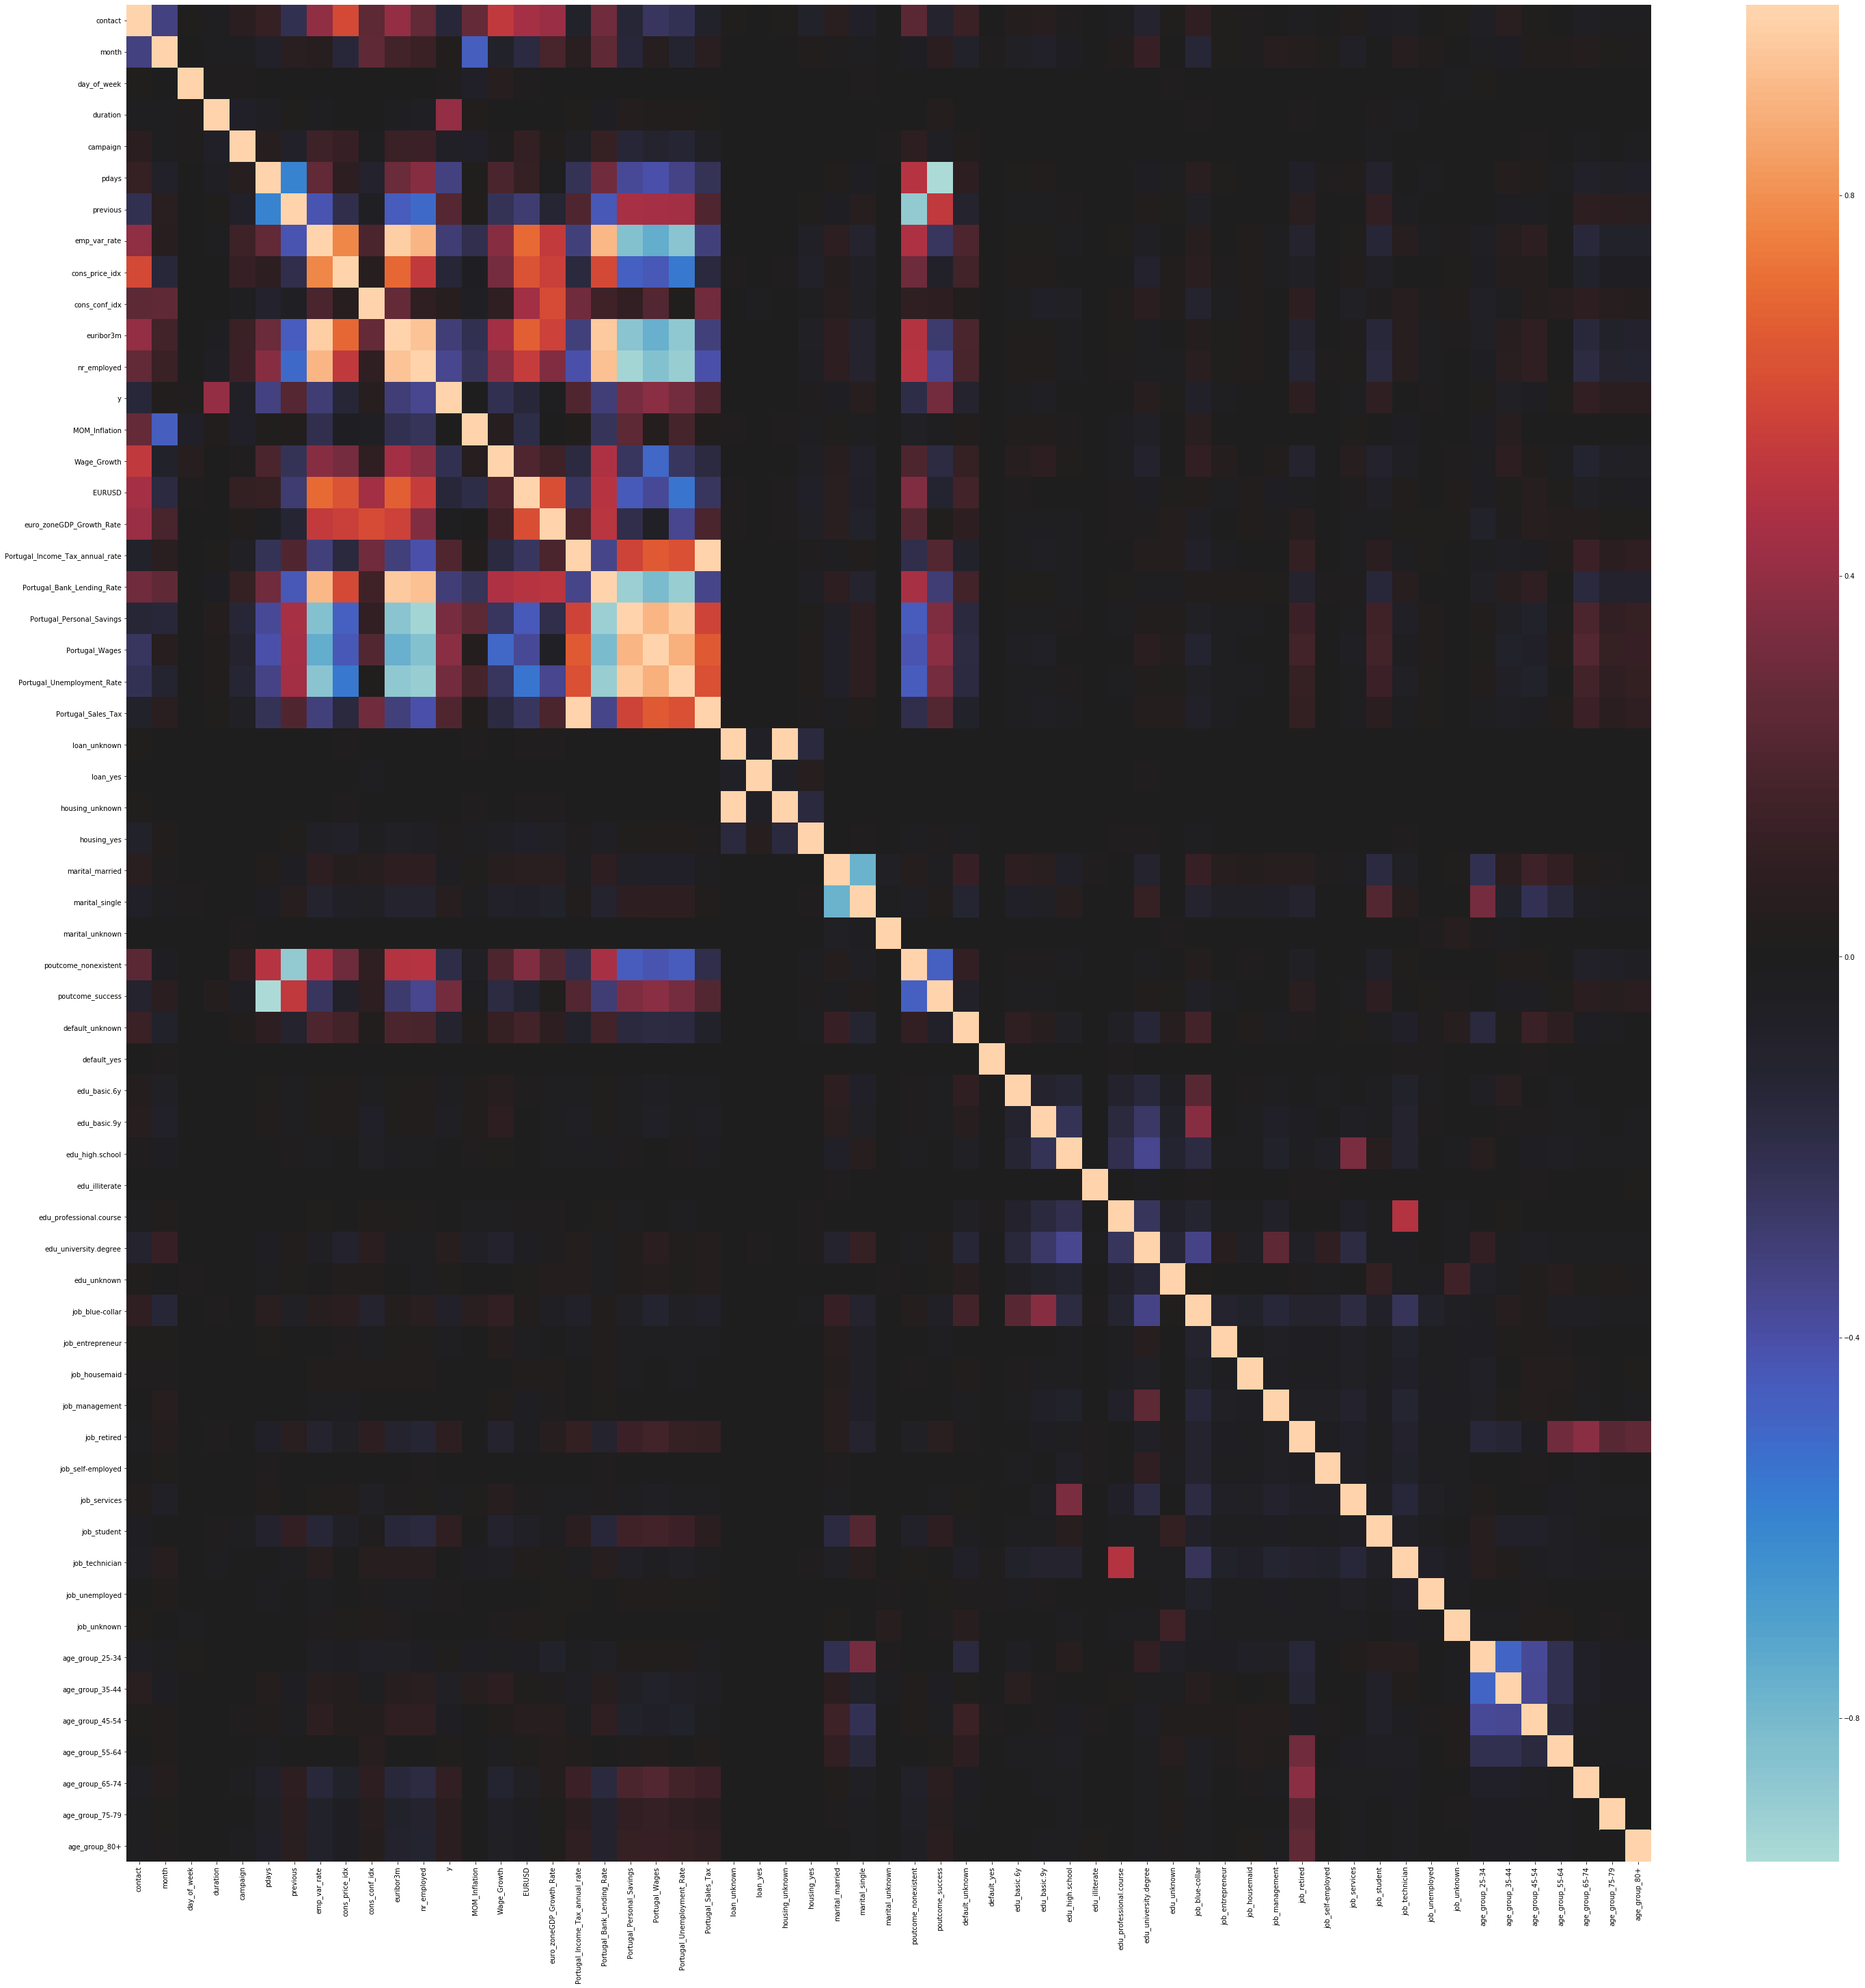

In [46]:
plt.figure(figsize=(50,50))
sns.heatmap(data_cleaned.corr(), center=0)
plt.show();

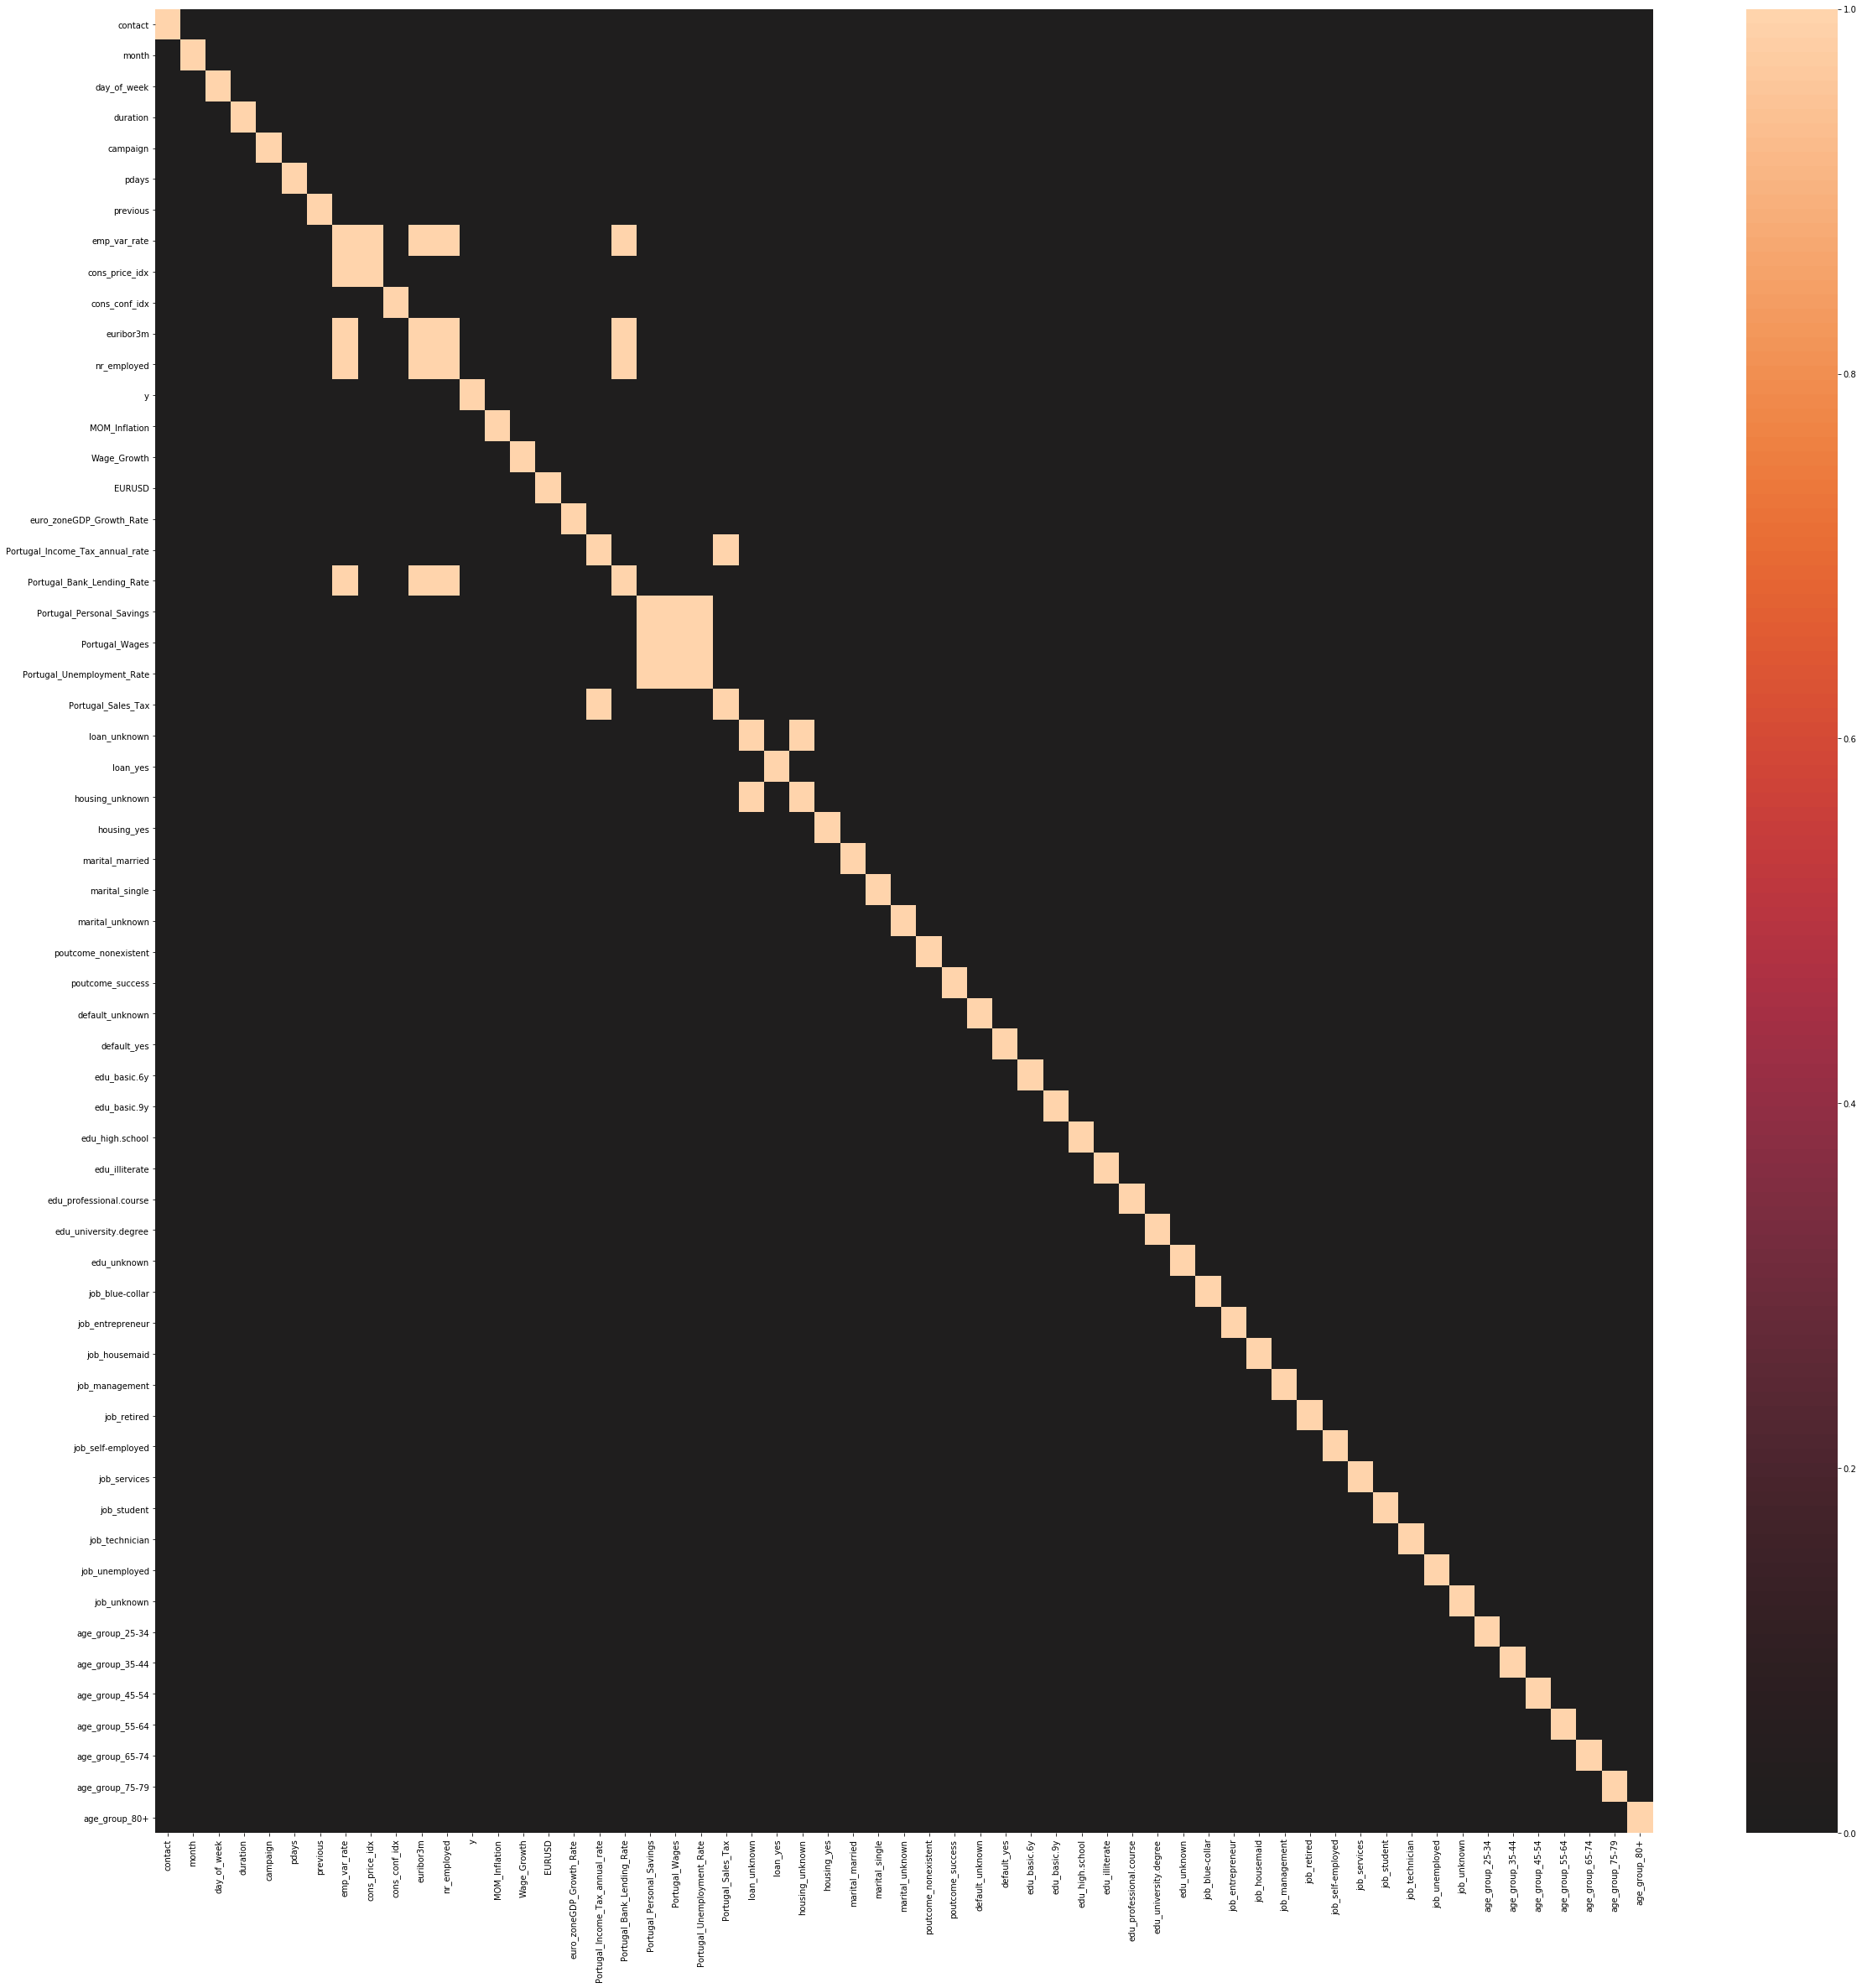

In [47]:
plt.figure(figsize=(40,40))
sns.heatmap(abs(data_cleaned.corr()>0.7), center=0)
plt.show();

In [48]:
data_cleaned.to_csv('/Users/naweedahmed/Desktop/Flatiron_Feb/capstone/data_feat.csv')